In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from PIL import Image
import pydicom as dicom

In [2]:
img = Image.open(r'C:\IBECPostDocDrive\2023_04_21_MatlabMRIDataProcessing\20230531_CSIFumarateResolutionTests\70_CSI32by16\tmp_img/SpectraTimePoint_1.png') 
# imgMRI = Image.open(r'C:/IBECPostDocDrive/2023_04_21_MatlabMRIDataProcessing/20230517_151358_DGC_repeatMultiWellTestH2ODMSO_DGC_repeatMultiWellTestH2ODMSO_1_1/8/tmp_img/MRICut.png') 
ds = dicom.dcmread(r"C:\IBECPostDocDrive\2023_04_21_MatlabMRIDataProcessing\20230531_CSIFumarateResolutionTests\81_LocaliserBigFOB_YAxis\pdata\1\dicom/DGC_FumarateC13Tests2_DGC_FumarateC13Tests2_DGC_FumarateC13T_E81_P1_Im1.dcm")
imgMRI = ds.pixel_array

img = img.convert("RGBA") 
datas = img.getdata() 
newData = [] 
for item in datas: 
    if item[0] == 255 and item[1] == 255 and item[2] == 255: 
        newData.append((255, 255, 255, 0)) 
    else: 
        newData.append(item) 
img.putdata(newData) 

In [9]:
xb = [0   256   256     0]*4
yb = [42.6667   42.6667  213.3333  213.3333]*4

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1256889728.py, line 1)

In [42]:
np.shape(np.concatenate((np.zeros([10,20]), np.zeros([10,20]))))

(20, 20)

In [64]:
pp1 = np.zeros([int((42.6667)*4),256*4,4])
np.shape(pp1)

(170, 1024, 4)

In [65]:
pp2 = np.asarray(img.resize([256*4, 256*4-int((42.6667+256-213.3333)*4)]))
np.shape(pp2)

(683, 1024, 4)

In [68]:
im_tmp = np.concatenate((pp1,pp2 ))
np.shape(im_tmp)

(853, 1024, 4)

In [69]:
1024-np.shape(im_tmp)[0]

171

In [71]:
imfin = np.concatenate((im_tmp, np.zeros( [1024-np.shape(im_tmp)[0] , 1024, 4])))

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint32)

In [20]:
np.shape(img.resize([256*4, 256*4-int((42.6667+256-213.3333)*4)]))

(683, 1024, 4)

In [10]:
np.shape(img.resize([i*4 for i in np.shape(imgMRI)]))

(1024, 1024, 4)

In [7]:
np.shape(np.asarray(Image.fromarray(imgMRI).resize([i*4 for i in np.shape(ds.pixel_array)])))

(1024, 1024)

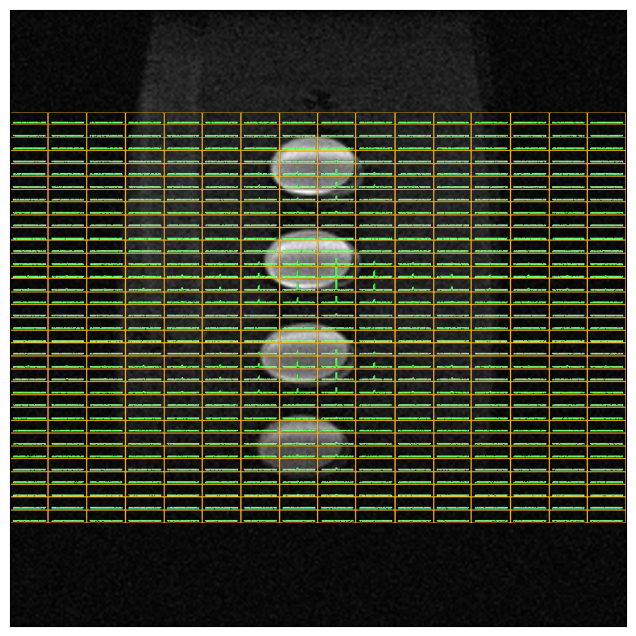

In [85]:
plt.figure(figsize=(8,8), dpi=100) 
plt.subplot(1, 1, 1) 
plt.imshow(np.asarray(Image.fromarray(imgMRI).resize([i*4 for i in np.shape(ds.pixel_array)])), cmap='gray')
# plt.imshow(imgMRI.resize([i*4 for i in np.shape(imgMRI)]), cmap='gray') 
# plt.imshow(img.resize([i*4 for i in np.shape(imgMRI)])) 
# plt.imshow(img.resize([256*4, 256*4-int((42.6667+256-213.3333)*4)]))
plt.imshow(Image.fromarray((imfin).astype(np.uint8)))
plt.xticks([]) 
plt.yticks([]) 
plt.savefig(r'C:\IBECPostDocDrive\2023_04_21_MatlabMRIDataProcessing\20230531_CSIFumarateResolutionTests\70_CSI32by16\tmp_img/MRICSIOverlay_FullMRIImage.png', bbox_inches='tight', pad_inches=0) 
plt.show()